In [1]:
import pandas as pd
import numpy as np

In [2]:
# to_datetime
data = [['2023-01-01', 10], ['2023-01-02', 50], ['2023-02-02', 20], 
        ['2023-Feb-03', 30], ['2023-Feb-04', 30], ['2023/Mar/01', 30]]
df = pd.DataFrame(data, columns=['날짜', '판매량'])
df

,날짜,판매량
0,2023-01-01,10
1,2023-01-02,50
2,2023-02-02,20
3,2023-Feb-03,30
4,2023-Feb-04,30
5,2023/Mar/01,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      6 non-null      object
 1   판매량     6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [4]:
pd.to_datetime(df['날짜'], format="mixed") # 열에만 적용 가능, but 세부 조정이 가능

0   2023-01-01
1   2023-01-02
2   2023-02-02
3   2023-02-03
4   2023-02-04
5   2023-03-01
Name: 날짜, dtype: datetime64[ns]

In [5]:
df['날짜'].astype('datetime64[ns]') # 데이터 프레임 전체에 적용 가능, but 날짜열은 한 두개 정도?

0   2023-01-01
1   2023-01-02
2   2023-02-02
3   2023-02-03
4   2023-02-04
5   2023-03-01
Name: 날짜, dtype: datetime64[ns]

In [6]:
# to_datetime 함수의 장점 (바꿀 수 없는 데이터는 NaT로 바꾼다)
s = pd.Series(['2025-01-03', '김판다'])
pd.to_datetime(s, errors='coerce') # to_numeric과 비슷

0   2025-01-03
1          NaT
dtype: datetime64[ns]

In [7]:
df1 = df.copy()
df1['날짜'] = pd.to_datetime(df1['날짜'], format="mixed")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6 non-null      datetime64[ns]
 1   판매량     6 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 228.0 bytes


In [8]:
# 날짜 데이터를 index로 바꾸면 여러 장점이 있음
df1 = df1.set_index('날짜')
df1

,판매량
날짜,
2023-01-01,10
2023-01-02,50
2023-02-02,20
2023-02-03,30
2023-02-04,30
2023-03-01,30


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-01-01 to 2023-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   판매량     6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [10]:
# 인덱싱과 슬라이싱
df1.loc['2023-02']

,판매량
날짜,
2023-02-02,20
2023-02-03,30
2023-02-04,30


In [11]:
df1.loc['2023-02':]

,판매량
날짜,
2023-02-02,20
2023-02-03,30
2023-02-04,30
2023-03-01,30


In [12]:
# 파일 불러오기에서 datetime 지정하기
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/shop_data.csv'
df_ex1 = pd.read_csv(url, parse_dates=['시간'], index_col=0)
df_ex1 # 행동 열 : V(view), C(cart), B(buy)

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 00:00:01,u514028527,패션,p1307115,411.59,V
2022-06-01 00:00:13,u550193582,화장품,p12705151,51.22,V
2022-06-01 00:00:13,u551977964,식품,p4100249,583.80,V
2022-06-01 00:00:19,u542985695,식품,p12705928,139.58,V
2022-06-01 00:00:31,u561564372,화장품,p26403348,84.43,V
...,...,...,...,...,...
2022-06-07 23:59:35,u521492259,패션,p12702930,35.78,V
2022-06-07 23:59:41,u548223253,식품,p4000169,102.94,V
2022-06-07 23:59:47,u566067205,인테리어,p16300035,31.92,V


In [13]:
# 인덱싱이 굉장히 간편하다
df_ex1.loc['2022-06-01 23:00']

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 23:00:01,u512686201,컴퓨터,p1005073,1133.09,V
2022-06-01 23:00:01,u546852746,식품,p15100148,378.36,V
2022-06-01 23:00:05,u545634079,화장품,p1005235,437.51,V
2022-06-01 23:00:17,u560348482,패션,p1004462,91.61,V
2022-06-01 23:00:30,u538139300,인테리어,p12711412,118.66,V
2022-06-01 23:00:31,u566030080,식품,p9400058,469.51,V
2022-06-01 23:00:36,u526605433,패션,p17200953,1029.22,V
2022-06-01 23:00:37,u564910799,가전,p17300713,107.52,V
2022-06-01 23:00:42,u542585097,식품,p3700278,69.47,V


In [14]:
# 슬라이싱 또한
df_ex1.loc['2022-06-02':'2022-06-04']

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-02 00:00:02,u566601875,인테리어,p54900002,46.33,V
2022-06-02 00:00:10,u513357826,식품,p1701432,483.90,V
2022-06-02 00:00:19,u518692140,자동차,p1306586,630.39,V
2022-06-02 00:00:20,u518117667,식품,p26400402,53.80,V
2022-06-02 00:00:22,u518117667,자동차,p26402558,792.55,V
...,...,...,...,...,...
2022-06-04 23:59:21,u517056379,자동차,p1307439,365.26,V
2022-06-04 23:59:25,u515414775,식품,p1003706,172.45,V
2022-06-04 23:59:31,u567495419,인테리어,p1005233,149.04,V


In [15]:
# date_range
# 시작일과 끝일 사이의 모든 날짜
pd.date_range('2022-01-03', '2022-01-10')

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# 시작일부터 지정된 개수의 배열 (날짜)
pd.date_range('2022-01-03', periods=3)

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05'], dtype='datetime64[ns]', freq='D')

In [17]:
# 결과가 index인 시리즈 만들기
idx = pd.date_range('2022-01-03', periods=3)
pd.Series([0, 1, 2], index=idx)

2022-01-03    0
2022-01-04    1
2022-01-05    2
Freq: D, dtype: int64

In [18]:
pd.Series(pd.date_range('2022-01-03', periods=3))

0   2022-01-03
1   2022-01-04
2   2022-01-05
dtype: datetime64[ns]

In [19]:
# 주기 바꾸기 (지정일 이후의 월의 마지막날)
pd.date_range('2022-01-03', periods=3, freq='ME')

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31'], dtype='datetime64[ns]', freq='ME')

In [20]:
# 주기 바꾸기 (지정일 이후의 월의 첫날)
pd.date_range('2022-01-03', periods=3, freq='MS')

DatetimeIndex(['2022-02-01', '2022-03-01', '2022-04-01'], dtype='datetime64[ns]', freq='MS')

In [21]:
# 주기 바꾸기 (2개월 주기의 마지막날)
pd.date_range('2022-01-03', periods=3, freq='2ME')

DatetimeIndex(['2022-01-31', '2022-03-31', '2022-05-31'], dtype='datetime64[ns]', freq='2ME')

In [22]:
# 주기 바꾸기 (년도별 마지막날)
pd.date_range('2022-01-03', periods=3, freq='YE-DEC')

DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [23]:
# 주기 바꾸기 (10분)
pd.date_range('2022-01-03', periods=10, freq='10min')

DatetimeIndex(['2022-01-03 00:00:00', '2022-01-03 00:10:00',
               '2022-01-03 00:20:00', '2022-01-03 00:30:00',
               '2022-01-03 00:40:00', '2022-01-03 00:50:00',
               '2022-01-03 01:00:00', '2022-01-03 01:10:00',
               '2022-01-03 01:20:00', '2022-01-03 01:30:00'],
              dtype='datetime64[ns]', freq='10min')

In [24]:
# dt 접근자
idx = pd.date_range('2022-01-03', periods=6, freq='43D 9h 10min')
df1 = pd.DataFrame(idx, columns=['date'])
df2 = pd.DataFrame([20, 20, 30, 20, 40, 10], index=idx, columns=['sales'])

In [25]:
df1['date'].dt.year

0    2022
1    2022
2    2022
3    2022
4    2022
5    2022
Name: date, dtype: int32

In [26]:
df1['date'].dt.quarter

0    1
1    1
2    1
3    2
4    2
5    3
Name: date, dtype: int32

In [27]:
df1['date'].dt.month

0    1
1    2
2    3
3    5
4    6
5    8
Name: date, dtype: int32

In [28]:
df1['date'].dt.date

0    2022-01-03
1    2022-02-15
2    2022-03-30
3    2022-05-13
4    2022-06-25
5    2022-08-07
Name: date, dtype: object

In [29]:
df1['date'].dt.normalize()

0   2022-01-03
1   2022-02-15
2   2022-03-30
3   2022-05-13
4   2022-06-25
5   2022-08-07
Name: date, dtype: datetime64[ns]

In [30]:
df1['date'].dt.time

0    00:00:00
1    09:10:00
2    18:20:00
3    03:30:00
4    12:40:00
5    21:50:00
Name: date, dtype: object

In [31]:
# 연도 주 날짜를 데이터 프레임으로(주로 주를 추출할 때 쓴다)
df1['date'].dt.isocalendar()

,year,week,day
0,2022,1,1
1,2022,7,2
2,2022,13,3
3,2022,19,5
4,2022,25,6
5,2022,31,7


In [32]:
# 인덱스에서 쓸 경우 dt 접근자 사용 안함
df2.index.year

Index([2022, 2022, 2022, 2022, 2022, 2022], dtype='int32')

In [33]:
# 표기형식 변형(object)
df1['date'].dt.strftime('%m/%d/%y')

0    01/03/22
1    02/15/22
2    03/30/22
3    05/13/22
4    06/25/22
5    08/07/22
Name: date, dtype: object

In [34]:
df1['date'].dt.strftime('%m/%d/%y [%a]')

0    01/03/22 [Mon]
1    02/15/22 [Tue]
2    03/30/22 [Wed]
3    05/13/22 [Fri]
4    06/25/22 [Sat]
5    08/07/22 [Sun]
Name: date, dtype: object

In [35]:
df1['date'].dt.strftime('%Y-%m')

0    2022-01
1    2022-02
2    2022-03
3    2022-05
4    2022-06
5    2022-08
Name: date, dtype: object

In [36]:
# to_period
df1['date'].dt.to_period(freq='M')

0    2022-01
1    2022-02
2    2022-03
3    2022-05
4    2022-06
5    2022-08
Name: date, dtype: period[M]

In [37]:
df1['date'].dt.to_period('Q')

0    2022Q1
1    2022Q1
2    2022Q1
3    2022Q2
4    2022Q2
5    2022Q3
Name: date, dtype: period[Q-DEC]

In [38]:
# resample
idx = pd.date_range('2023-01-01', periods=6, freq='20D 9h 10min')
df1 = pd.DataFrame(idx, columns=['날짜'])
df1['금액'] = [10000, 20000, 20000, 20000, 30000, 10000]
df1['구분'] = ['입금', '입금', '출금', '입금', '입금', '출금']
df2 = df1.set_index('날짜')
df1

,날짜,금액,구분
0,2023-01-01 00:00:00,10000,입금
1,2023-01-21 09:10:00,20000,입금
2,2023-02-10 18:20:00,20000,출금
3,2023-03-03 03:30:00,20000,입금
4,2023-03-23 12:40:00,30000,입금
5,2023-04-12 21:50:00,10000,출금


In [39]:
df = df1.copy()
df['월'] = df['날짜'].dt.strftime('%Y-%m')
df

,날짜,금액,구분,월
0,2023-01-01 00:00:00,10000,입금,2023-01
1,2023-01-21 09:10:00,20000,입금,2023-01
2,2023-02-10 18:20:00,20000,출금,2023-02
3,2023-03-03 03:30:00,20000,입금,2023-03
4,2023-03-23 12:40:00,30000,입금,2023-03
5,2023-04-12 21:50:00,10000,출금,2023-04


In [40]:
# groupby로 월별 금액을 집계
df.groupby('월')['금액'].sum()

월
2023-01    30000
2023-02    20000
2023-03    50000
2023-04    10000
Name: 금액, dtype: int64

In [41]:
# 시계열의 groupby -> resample 주기를 사용 : 열을 따로 만들 필요가 없다.
df1.resample('ME', on='날짜')['금액'].sum()

날짜
2023-01-31    30000
2023-02-28    20000
2023-03-31    50000
2023-04-30    10000
Freq: ME, Name: 금액, dtype: int64

In [42]:
df1.resample('QE', on='날짜')['금액'].sum()

날짜
2023-03-31    100000
2023-06-30     10000
Freq: QE-DEC, Name: 금액, dtype: int64

In [43]:
df1.resample('MS', on='날짜')['금액'].sum()

날짜
2023-01-01    30000
2023-02-01    20000
2023-03-01    50000
2023-04-01    10000
Freq: MS, Name: 금액, dtype: int64

In [44]:
# 시계열 resample과 groupby를 함께 사용할 때 (groupby부터 사용한다)
# 그룹화(g -> r)
df1.groupby('구분').resample('MS', on='날짜')['금액'].sum().unstack(0)

구분,입금,출금
날짜,,
2023-01-01,30000.0,NaN
2023-02-01,0.0,20000.0
2023-03-01,50000.0,0.0
2023-04-01,NaN,10000.0


In [45]:
# DatetimeIndex일 때는 on의 지정이 필요없다
df2.resample("ME")['금액'].sum()

날짜
2023-01-31    30000
2023-02-28    20000
2023-03-31    50000
2023-04-30    10000
Freq: ME, Name: 금액, dtype: int64

### 온라인 쇼핑몰 프로젝트

In [46]:
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/shop_data.csv'
# csv파일에서 부를때 datetime으로 지정하고 index로 지정하기
df_ex1 = pd.read_csv(url, parse_dates=['시간'], index_col=0)
df_ex1 # 행동 열 : V(view), C(cart), B(buy)

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 00:00:01,u514028527,패션,p1307115,411.59,V
2022-06-01 00:00:13,u550193582,화장품,p12705151,51.22,V
2022-06-01 00:00:13,u551977964,식품,p4100249,583.80,V
2022-06-01 00:00:19,u542985695,식품,p12705928,139.58,V
2022-06-01 00:00:31,u561564372,화장품,p26403348,84.43,V
...,...,...,...,...,...
2022-06-07 23:59:35,u521492259,패션,p12702930,35.78,V
2022-06-07 23:59:41,u548223253,식품,p4000169,102.94,V
2022-06-07 23:59:47,u566067205,인테리어,p16300035,31.92,V


In [47]:
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81433 entries, 2022-06-01 00:00:01 to 2022-06-07 23:59:59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   유저코드    81433 non-null  object 
 1   카테고리    81433 non-null  object 
 2   제품코드    81433 non-null  object 
 3   가격      81433 non-null  float64
 4   행동      81433 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.7+ MB


In [48]:
df_ex1.resample('D')['가격'].count()

시간
2022-06-01    16974
2022-06-02    12815
2022-06-03    10063
2022-06-04     9892
2022-06-05     9285
2022-06-06     9141
2022-06-07    13263
Freq: D, Name: 가격, dtype: int64

<Axes: >

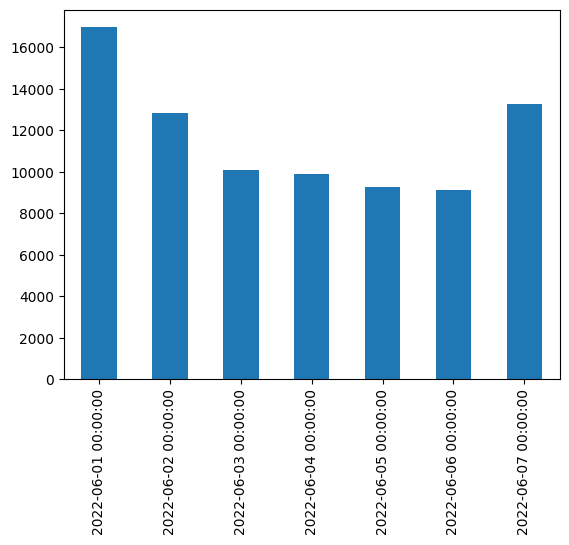

In [49]:
df_ex1.resample('D')['가격'].count().rename_axis('').plot(kind='bar')

In [50]:
df_ex1.groupby('행동').resample('D')['가격'].count()

행동  시간        
B   2022-06-01       75
    2022-06-02       72
    2022-06-03       61
    2022-06-04       63
    2022-06-05       46
    2022-06-06       35
    2022-06-07       60
C   2022-06-01       91
    2022-06-02       87
    2022-06-03       81
    2022-06-04       63
    2022-06-05       64
    2022-06-06       60
    2022-06-07       93
V   2022-06-01    16808
    2022-06-02    12656
    2022-06-03     9921
    2022-06-04     9766
    2022-06-05     9175
    2022-06-06     9046
    2022-06-07    13110
Name: 가격, dtype: int64

In [51]:
df_ex1.groupby('행동').resample('D')['가격'].count().unstack(0) # 멀티 인덱스일때 unstack 사용

행동,B,C,V
시간,,,
2022-06-01,75,91,16808
2022-06-02,72,87,12656
2022-06-03,61,81,9921
2022-06-04,63,63,9766
2022-06-05,46,64,9175
2022-06-06,35,60,9046
2022-06-07,60,93,13110
